In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

ModuleNotFoundError: No module named 'keras'

In [52]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [51]:
print('train:',len(x_img_train))
print('test:',len(x_img_test))

train: 50000
test: 10000


In [44]:
x_img_train.shape

(50000, 32, 32, 3)

In [45]:
y_label_train.shape

(50000, 1)

In [50]:
#定義字典
dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"shop",9:"truck"}

import matplotlib.pyplot as plt
def plot_img(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=10
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        
        title=dict[labels[i][0]]
        if len(prediction)>0:
            title=title+","+dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

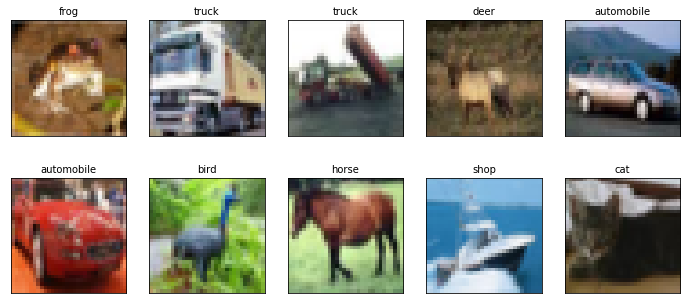

In [60]:
plot_img(x_img_train,y_label_train,[],0)

In [62]:
x_img_train_1=x_img_train.astype('float32')/255
x_img_test_1=x_img_test.astype('float32')/255

from keras.utils import np_utils
y_label_train_1=np_utils.to_categorical(y_label_train)
y_label_test_1=np_utils.to_categorical(y_label_test)

In [63]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))


print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
__________

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_img_train_1,y=y_label_train_1,validation_split=0.2,epochs=10,batch_size=128,verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 160s - loss: 1.4919 - acc: 0.4637 - val_loss: 1.2926 - val_acc: 0.5675
Epoch 2/10
 - 158s - loss: 1.1351 - acc: 0.5983 - val_loss: 1.1567 - val_acc: 0.6276
Epoch 3/10


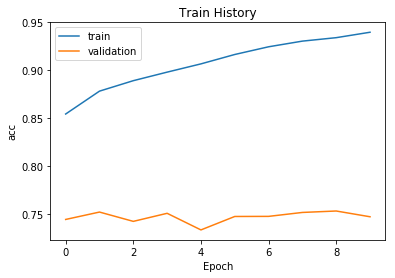

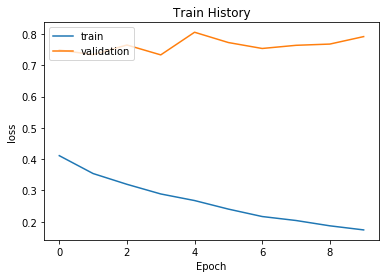

In [64]:
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [67]:
scores=model.evaluate(x_img_test_1,y_label_test_1)
print()
print('accuracy=',scores[1])

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

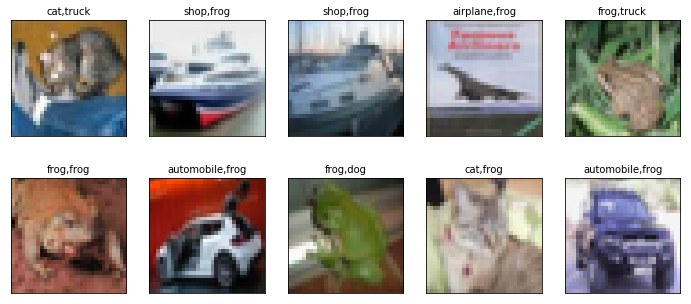

In [70]:
prediction=model.predict_classes(x_img_test_1)
plot_img(x_img_test,y_label_test,prediction,0)